In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from itertools import combinations
import plotnine as p
import ssl 

In [4]:
ssl._create_default_https_context = ssl._create_unverified_context
#read_data 
def read_data(file):
    pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)
np.random.seed(1)

tb = pd.DataFrame({
    'x': np.random.normal(size=10000),
    'u': np.random.normal(size=10000)
})
tb['y'] = 5.5*tb['x'].values + 12*tb['u'].values
reg_tb = sm.OLS.from_formula('y~x', data=tb).fit()
reg_tb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     2237.
Date:                Sat, 19 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:34:38   Log-Likelihood:                -39049.
No. Observations:               10000   AIC:                         7.810e+04
Df Residuals:                    9998   BIC:                         7.812e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1114      0.120      0.927      0.354      -0.124       0.347
x              5.6887      0.120     47.293      0.000       5.453       5.924
==============================================================================
Omnibus:                        0.640   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.672
Skew:                          -0.012   Prob(JB):                        0.715
Kurtosis:                       2.968   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

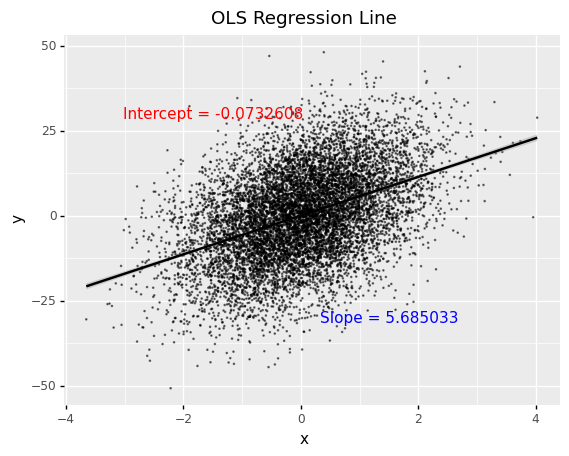

<ggplot: (379815434)>

In [6]:
tb['yhat1'] = reg_tb.predict(tb)
tb['yhat2'] = 0.114 + 5.6887*tb['x']
tb['uhat1'] = reg_tb.resid
tb['uhat2'] = tb['y'] - tb['yhat2']

tb.describe()

p.ggplot(tb, p.aes(x='x', y='y')) +\
    p.ggtitle("OLS Regression Line") +\
    p.geom_point(size = 0.05, color = "black", alpha = 0.5) +\
    p.geom_smooth(p.aes(x='x', y='y'), method = "lm", color = "black") +\
    p.annotate("text", x = -1.5, y = 30, color = "red", 
             label = "Intercept = {}".format(-0.0732608)) +\
    p.annotate("text", x = 1.5, y = -30, color = "blue", 
             label = "Slope = {}".format(5.685033))
    

In [7]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)


tb = pd.DataFrame({
    'x': 9*np.random.normal(size=10),
    'u': 36*np.random.normal(size=10)})
tb['y'] = 3*tb['x'].values + 2*tb['u'].values

reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()

tb['yhat1'] = reg_tb.predict(tb)
tb['uhat1'] = reg_tb.resid

tb.describe()

,x,u,y,yhat1,uhat1
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.844111,7.893200,13.254067,13.254067,0.000000
std,8.542685,30.996325,76.997388,53.502037,55.372645
min,-17.384075,-39.860946,-131.874117,-90.334179,-111.847362
25%,-4.565266,-20.063648,-32.853301,-10.051177,-30.320668
50%,-1.649420,15.001222,19.110051,8.210495,18.233206
75%,6.298850,35.952517,68.586508,57.989762,35.401184
max,10.207313,39.731946,108.705561,82.468100,59.304699


### Monte Carlo Simulation to Estimate the population parameter 


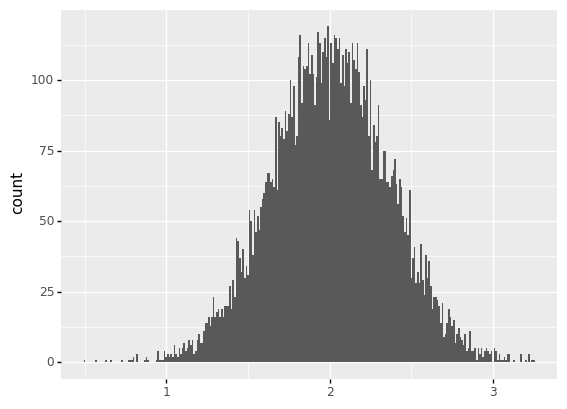

<ggplot: (396730055)>

In [11]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

coefs = np.zeros(10000) 
for i in range(10000):
    tb = pd.DataFrame({
        'x': 9 + np.random.normal(size=10000),
        'u':36 * np.random.normal(size=10000)})
    tb['y'] = 3 + 2*tb['x'].values + tb['u'].values
    
    reg_tb = sm.OLS.from_formula("y~x", data=tb).fit()
    
    coefs[i] = reg_tb.params['x']
p.ggplot() +\
    p.geom_histogram(p.aes(x=coefs), binwidth = 0.01)

/opt/homebrew/Caskroom/miniforge/base/envs/mixtape/lib/python3.9/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/opt/homebrew/Caskroom/miniforge/base/envs/mixtape/lib/python3.9/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


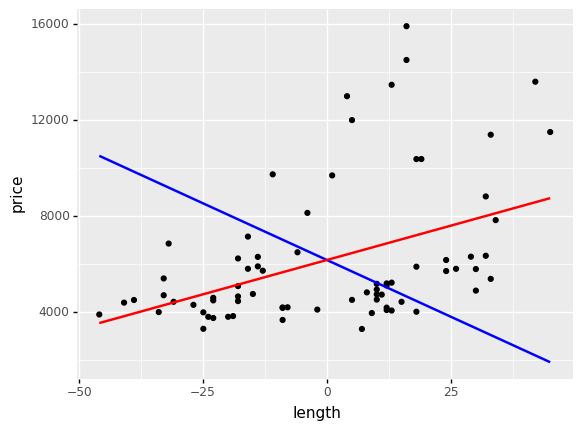

<ggplot: (340284239)>

In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)


auto = pd.read_stata('https://raw.github.com/scunning1975/mixtape/master/auto.dta')
auto['length'] = auto['length'] - auto['length'].mean()

lm1 = sm.OLS.from_formula('price ~ length', data=auto).fit()
lm2 = sm.OLS.from_formula('price ~ length + weight + headroom + mpg', data=auto).fit()


coef_lm1 = lm1.params
coef_lm2 = lm2.params
resid_lm2 = lm2.resid

auto['y_single'] = coef_lm1[0] + coef_lm1[1]*auto['length']
auto['y_multi'] = coef_lm1[0] + coef_lm2[1]*auto['length']

p.ggplot(auto) +\
  p.geom_point(p.aes(x = 'length', y = 'price')) +\
  p.geom_smooth(p.aes(x = 'length', y = 'y_multi'), color = "blue") +\
  p.geom_smooth(p.aes(x = 'length', y = 'y_single'), color="red")

In [2]:
auto

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,y_single,y_multi
0,AMC Concord,4099,22,3.0,2.5,11,2930,-1.932432,40,121,3.58,Domestic,6054.717296,6347.864877
1,AMC Pacer,4749,17,3.0,3.0,11,3350,-14.932432,40,258,2.53,Domestic,5311.088199,7576.319500
2,AMC Spirit,3799,22,NaN,3.0,12,2640,-19.932432,35,121,3.08,Domestic,5025.077008,8048.802048
3,Buick Century,4816,20,3.0,4.5,16,3250,8.067568,40,196,2.93,Domestic,6626.739679,5402.899781
4,Buick Electra,7827,15,4.0,4.0,20,4080,34.067568,43,350,2.41,Domestic,8113.997873,2945.990534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,23,4.0,2.5,12,2160,-15.932432,36,97,3.74,Foreign,5253.885961,7670.816010
70,VW Diesel,5397,41,5.0,3.0,15,2040,-32.932432,35,90,3.78,Foreign,4281.447911,9277.256672
71,VW Rabbit,4697,25,4.0,3.0,15,1930,-32.932432,35,89,3.78,Foreign,4281.447911,9277.256672
72,VW Scirocco,6850,25,4.0,2.0,16,1990,-31.932432,36,97,3.78,Foreign,4338.650149,9182.760162


/opt/homebrew/Caskroom/miniforge/base/envs/mixtape/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 27'. Pick better value with 'binwidth'.


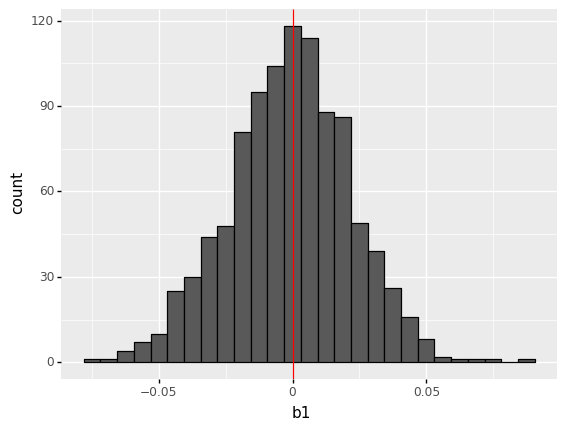

<ggplot: (340417922)>

In [5]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)



def gen_cluster(param = (.1, .5), n = 1000, n_cluster = 50, rho = .5):
    # Function to generate clustered data

    # individual level
    Sigma_i = np.array((1, 0, 0, 1 - rho)).reshape(2,2)

    values_i = np.random.multivariate_normal(np.zeros(2), Sigma_i, size = n)

    # cluster level
    cluster_name = np.repeat(np.arange(1, n_cluster+1), repeats = n / n_cluster)
    Sigma_cl = np.array((1, 0, 0, rho)).reshape(2,2)
    values_cl = np.random.multivariate_normal(np.zeros(2),Sigma_cl, size = n_cluster)

    # predictor var consists of individual- and cluster-level components
    x = values_i[: , 0] + np.repeat(values_cl[: , 0], repeats = n / n_cluster)

    # error consists of individual- and cluster-level components
    error = values_i[: , 1] + np.repeat(values_cl[: , 1], repeats = n / n_cluster)

    # data generating process
    y = param[0] + param[1]*x + error
    
    df = pd.DataFrame({'x':x, 'y':y, 'cluster': cluster_name})
    return df

def cluster_sim(param = (.1, .5), n = 1000, n_cluster = 50,
                        rho = .5, cluster_robust = False):

    df = gen_cluster(param = param, n = n , n_cluster = n_cluster, rho = rho)

    if not cluster_robust:
        fit = sm.OLS.from_formula('y ~ x', data = df).fit()
    else: # cluster-robust SE
        fit = sm.OLS.from_formula('y ~ x', data = df).fit(cov_type='cluster', cov_kwds={'groups': df['cluster']})
    
    b1 = fit.params[1]
    Sigma = fit.cov_params()   
    
    se = np.sqrt(np.diag(Sigma)[1])
    ci95 = se*1.96
    b1_ci95 = (b1-ci95, b1+ci95)

    return (b1, se, *b1_ci95)

def run_cluster_sim(n_sims = 1000, param = (.1, .5), n = 1000,
                            n_cluster = 50, rho = .5, cluster_robust = False):

    res = [cluster_sim(param = param, n = n, rho = rho,
                                      n_cluster = n_cluster,
                                      cluster_robust = cluster_robust) for x in range(n_sims)]
    df = pd.DataFrame(res)
    df.columns = ('b1', 'se_b1', 'ci95_lower', 'ci95_upper')
    df['param_caught'] = (df['ci95_lower'] <= param[1]) & (param[1] <= df['ci95_upper'])
    df['id'] = df.index
    return df

# Simulation no clustered SE
sim_params = [.4, 0] # beta1 = 0: no effect of x on y
sim_nocluster = run_cluster_sim(n_sims=1000, param = sim_params, rho=0, cluster_robust = False)

p.ggplot(sim_nocluster, p.aes('b1')) +\
  p.geom_histogram(color = 'black') +\
  p.geom_vline(xintercept = sim_params[1], color = 'red')

# p.ggplot(sim_nocluster.sample(100).sort_values('b1'),
#                          p.aes(x = 'factor(id)', y = 'b1', 
#                              ymin = 'ci95_lower', ymax = 'ci95_upper',
#                              color = 'param_caught')) +\
#   p.geom_hline(yintercept = sim_params[1], linetype = 'dashed') +\
#   p.geom_pointrange() +\
#   p.labs(x = 'sim ID', y = 'b1', title = 'Randomly Chosen 100 95% CIs') +\
#   p.scale_color_discrete(name = 'True param value', labels = ('missed', 'hit')) +\
#   p.coord_flip()


# 1 - sum(sim_nocluster.param_caught)/sim_nocluster.shape[0]

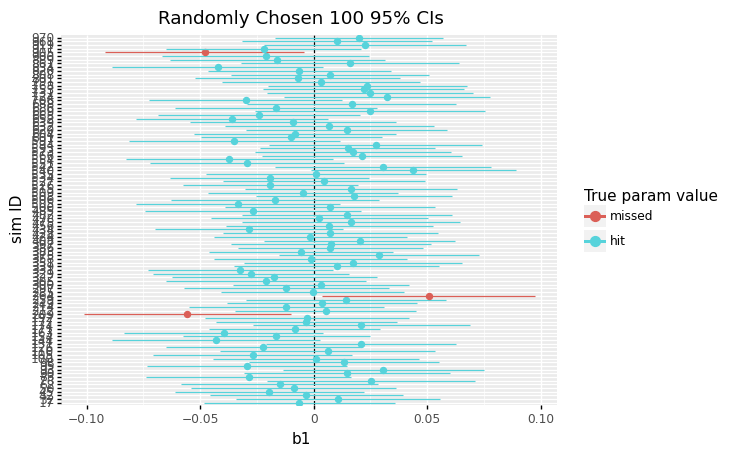

<ggplot: (341325418)>

In [6]:
p.ggplot(sim_nocluster.sample(100).sort_values('b1'),
                         p.aes(x = 'factor(id)', y = 'b1', 
                             ymin = 'ci95_lower', ymax = 'ci95_upper',
                             color = 'param_caught')) +\
  p.geom_hline(yintercept = sim_params[1], linetype = 'dashed') +\
  p.geom_pointrange() +\
  p.labs(x = 'sim ID', y = 'b1', title = 'Randomly Chosen 100 95% CIs') +\
  p.scale_color_discrete(name = 'True param value', labels = ('missed', 'hit')) +\
  p.coord_flip()


In [7]:
1 - sum(sim_nocluster.param_caught)/sim_nocluster.shape[0]

0.05500000000000005

/opt/homebrew/Caskroom/miniforge/base/envs/mixtape/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 24'. Pick better value with 'binwidth'.


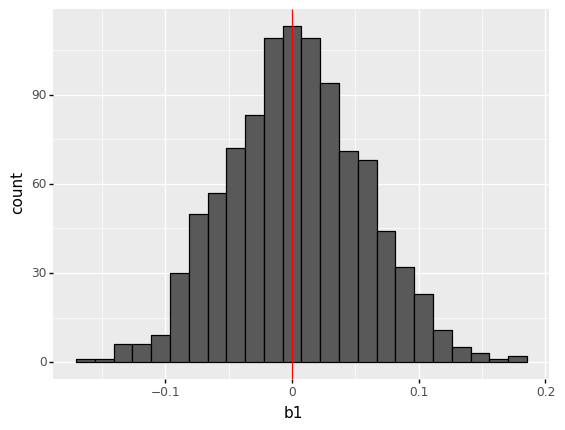

<ggplot: (341603024)>

In [9]:
# cluster datta 
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)


def gen_cluster(param = (.1, .5), n = 1000, n_cluster = 50, rho = .5):
    # Function to generate clustered data

    # individual level
    Sigma_i = np.array((1, 0, 0, 1 - rho)).reshape(2,2)

    values_i = np.random.multivariate_normal(np.zeros(2), Sigma_i, size = n)

    # cluster level
    cluster_name = np.repeat(np.arange(1, n_cluster+1), repeats = n / n_cluster)
    Sigma_cl = np.array((1, 0, 0, rho)).reshape(2,2)
    values_cl = np.random.multivariate_normal(np.zeros(2),Sigma_cl, size = n_cluster)

    # predictor var consists of individual- and cluster-level components
    x = values_i[: , 0] + np.repeat(values_cl[: , 0], repeats = n / n_cluster)

    # error consists of individual- and cluster-level components
    error = values_i[: , 1] + np.repeat(values_cl[: , 1], repeats = n / n_cluster)

    # data generating process
    y = param[0] + param[1]*x + error
    
    df = pd.DataFrame({'x':x, 'y':y, 'cluster': cluster_name})
    return df

def cluster_sim(param = (.1, .5), n = 1000, n_cluster = 50,
                        rho = .5, cluster_robust = False):

    df = gen_cluster(param = param, n = n , n_cluster = n_cluster, rho = rho)

    if not cluster_robust:
        fit = sm.OLS.from_formula('y ~ x', data = df).fit()
    else: # cluster-robust SE
        fit = sm.OLS.from_formula('y ~ x', data = df).fit(cov_type='cluster', cov_kwds={'groups': df['cluster']})
    
    b1 = fit.params[1]
    Sigma = fit.cov_params()   
    
    se = np.sqrt(np.diag(Sigma)[1])
    ci95 = se*1.96
    b1_ci95 = (b1-ci95, b1+ci95)

    return (b1, se, *b1_ci95)

def run_cluster_sim(n_sims = 1000, param = (.1, .5), n = 1000,
                            n_cluster = 50, rho = .5, cluster_robust = False):

    res = [cluster_sim(param = param, n = n, rho = rho,
                                      n_cluster = n_cluster,
                                      cluster_robust = cluster_robust) for x in range(n_sims)]
    df = pd.DataFrame(res)
    df.columns = ('b1', 'se_b1', 'ci95_lower', 'ci95_upper')
    df['param_caught'] = (df['ci95_lower'] <= param[1]) & (param[1] <= df['ci95_upper'])
    df['id'] = df.index
    return df


# Simulation clustered SE
sim_params = [.4, 0] # beta1 = 0: no effect of x on y
sim_nocluster = run_cluster_sim(n_sims=1000, param = sim_params, cluster_robust = False)

p.ggplot(sim_nocluster, p.aes('b1')) +  p.geom_histogram(color = 'black') +  p.geom_vline(xintercept = sim_params[1], color = 'red')

# 1 - sum(sim_nocluster.param_caught)/sim_nocluster.shape[0]

In [10]:
1 - sum(sim_nocluster.param_caught)/sim_nocluster.shape[0]

0.41600000000000004

/opt/homebrew/Caskroom/miniforge/base/envs/mixtape/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 30'. Pick better value with 'binwidth'.


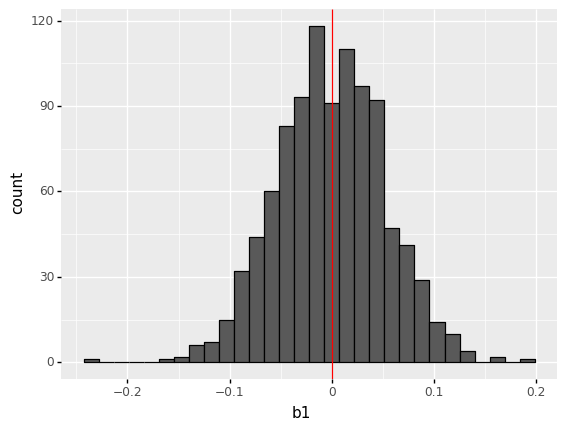

<ggplot: (341648631)>

In [11]:
#cluster 4 
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)



def gen_cluster(param = (.1, .5), n = 1000, n_cluster = 50, rho = .5):
    # Function to generate clustered data

    # individual level
    Sigma_i = np.array((1, 0, 0, 1 - rho)).reshape(2,2)

    values_i = np.random.multivariate_normal(np.zeros(2), Sigma_i, size = n)

    # cluster level
    cluster_name = np.repeat(np.arange(1, n_cluster+1), repeats = n / n_cluster)
    Sigma_cl = np.array((1, 0, 0, rho)).reshape(2,2)
    values_cl = np.random.multivariate_normal(np.zeros(2),Sigma_cl, size = n_cluster)

    # predictor var consists of individual- and cluster-level components
    x = values_i[: , 0] + np.repeat(values_cl[: , 0], repeats = n / n_cluster)

    # error consists of individual- and cluster-level components
    error = values_i[: , 1] + np.repeat(values_cl[: , 1], repeats = n / n_cluster)

    # data generating process
    y = param[0] + param[1]*x + error
    
    df = pd.DataFrame({'x':x, 'y':y, 'cluster': cluster_name})
    return df

def cluster_sim(param = (.1, .5), n = 1000, n_cluster = 50,
                        rho = .5, cluster_robust = False):

    df = gen_cluster(param = param, n = n , n_cluster = n_cluster, rho = rho)

    if not cluster_robust:
        fit = sm.OLS.from_formula('y ~ x', data = df).fit()
    else: # cluster-robust SE
        fit = sm.OLS.from_formula('y ~ x', data = df).fit(cov_type='cluster', cov_kwds={'groups': df['cluster']})
    
    b1 = fit.params[1]
    Sigma = fit.cov_params()   
    
    se = np.sqrt(np.diag(Sigma)[1])
    ci95 = se*1.96
    b1_ci95 = (b1-ci95, b1+ci95)

    return (b1, se, *b1_ci95)


def run_cluster_sim(n_sims = 1000, param = (.1, .5), n = 1000,
                            n_cluster = 50, rho = .5, cluster_robust = False):

    res = [cluster_sim(param = param, n = n, rho = rho,
                                      n_cluster = n_cluster,
                                      cluster_robust = cluster_robust) for x in range(n_sims)]
    df = pd.DataFrame(res)
    df.columns = ('b1', 'se_b1', 'ci95_lower', 'ci95_upper')
    df['param_caught'] = (df['ci95_lower'] <= param[1]) & (param[1] <= df['ci95_upper'])
    df['id'] = df.index
    return df


# Simulation clustered SE
sim_params = [.4, 0] # beta1 = 0: no effect of x on y
sim_nocluster = run_cluster_sim(n_sims=1000, param = sim_params, cluster_robust = True)

p.ggplot(sim_nocluster, p.aes('b1')) +  p.geom_histogram(color = 'black') +  p.geom_vline(xintercept = sim_params[1], color = 'red')

# p.ggplot(sim_nocluster.sample(100).sort_values('b1'),
#                          p.aes(x = 'factor(id)', y = 'b1', 
#                              ymin = 'ci95_lower', ymax = 'ci95_upper',
#                              color = 'param_caught')) +\
#   p.geom_hline(yintercept = sim_params[1], linetype = 'dashed') +\
#   p.geom_pointrange() +\
#   p.labs(x = 'sim ID', y = 'b1', title = 'Randomly Chosen 100 95% CIs') +\
#   p.scale_color_discrete(name = 'True param value', labels = ('missed', 'hit')) +\
#   p.coord_flip()


# 1 - sum(sim_nocluster.param_caught)/sim_nocluster.shape[0]

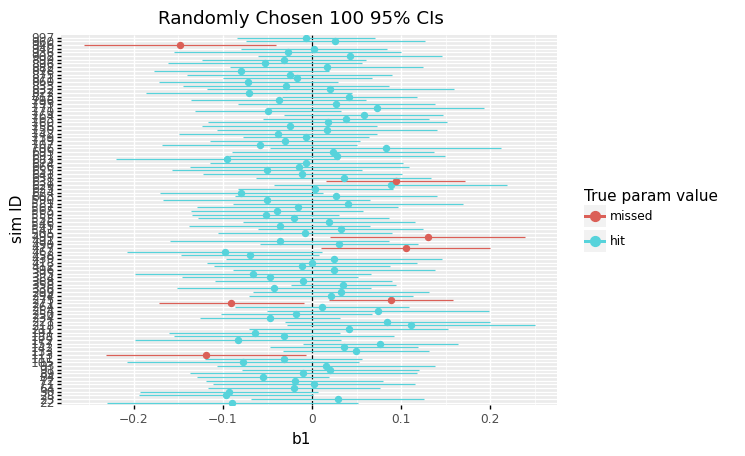

<ggplot: (341733834)>

In [12]:
p.ggplot(sim_nocluster.sample(100).sort_values('b1'),
                         p.aes(x = 'factor(id)', y = 'b1', 
                             ymin = 'ci95_lower', ymax = 'ci95_upper',
                             color = 'param_caught')) +\
  p.geom_hline(yintercept = sim_params[1], linetype = 'dashed') +\
  p.geom_pointrange() +\
  p.labs(x = 'sim ID', y = 'b1', title = 'Randomly Chosen 100 95% CIs') +\
  p.scale_color_discrete(name = 'True param value', labels = ('missed', 'hit')) +\
  p.coord_flip()

In [13]:
1 - sum(sim_nocluster.param_caught)/sim_nocluster.shape[0]

0.06699999999999995